# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим что у нас с нашим датасетом:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Импортим нашу тестовую выборку, заменим все пробелы и пропуски на **np.nan**

In [ ]:
X_test = pd.read_csv('./test.csv')
data.replace(" ",np.nan,inplace=True)
X_test.replace(" ",np.nan,inplace=True)

Проверим есть ли дубликаты и уберем их при наличии:

In [ ]:
print(f"Дубликаты: {data.drop(target_col, axis=1).duplicated(keep=False).sum()}")

data[data.drop(target_col, axis=1).duplicated(keep=False)].sort_values(by=[*data.columns])

Дубликаты: 41


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3735,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


Посмотрим на распределение нанов:

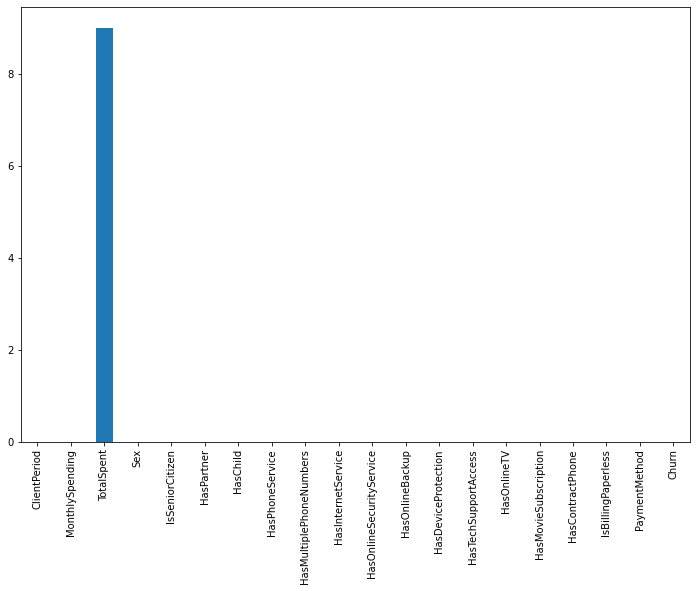

In [ ]:
pd.DataFrame(data.isna().sum(), columns=["nan count"]).plot(kind="bar", legend=False, figsize=(12, 8))

Скорее всего это клиенты не совершившие покупку, тогда они потратили 0, заменим np.nan на 0

In [ ]:
data["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
X_test["TotalSpent"] = X_test.TotalSpent.fillna(0).astype(float)

## Анализ данных (3 балла)

1) Построим графики и посмотрим на уже более менее очищенную информацию

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

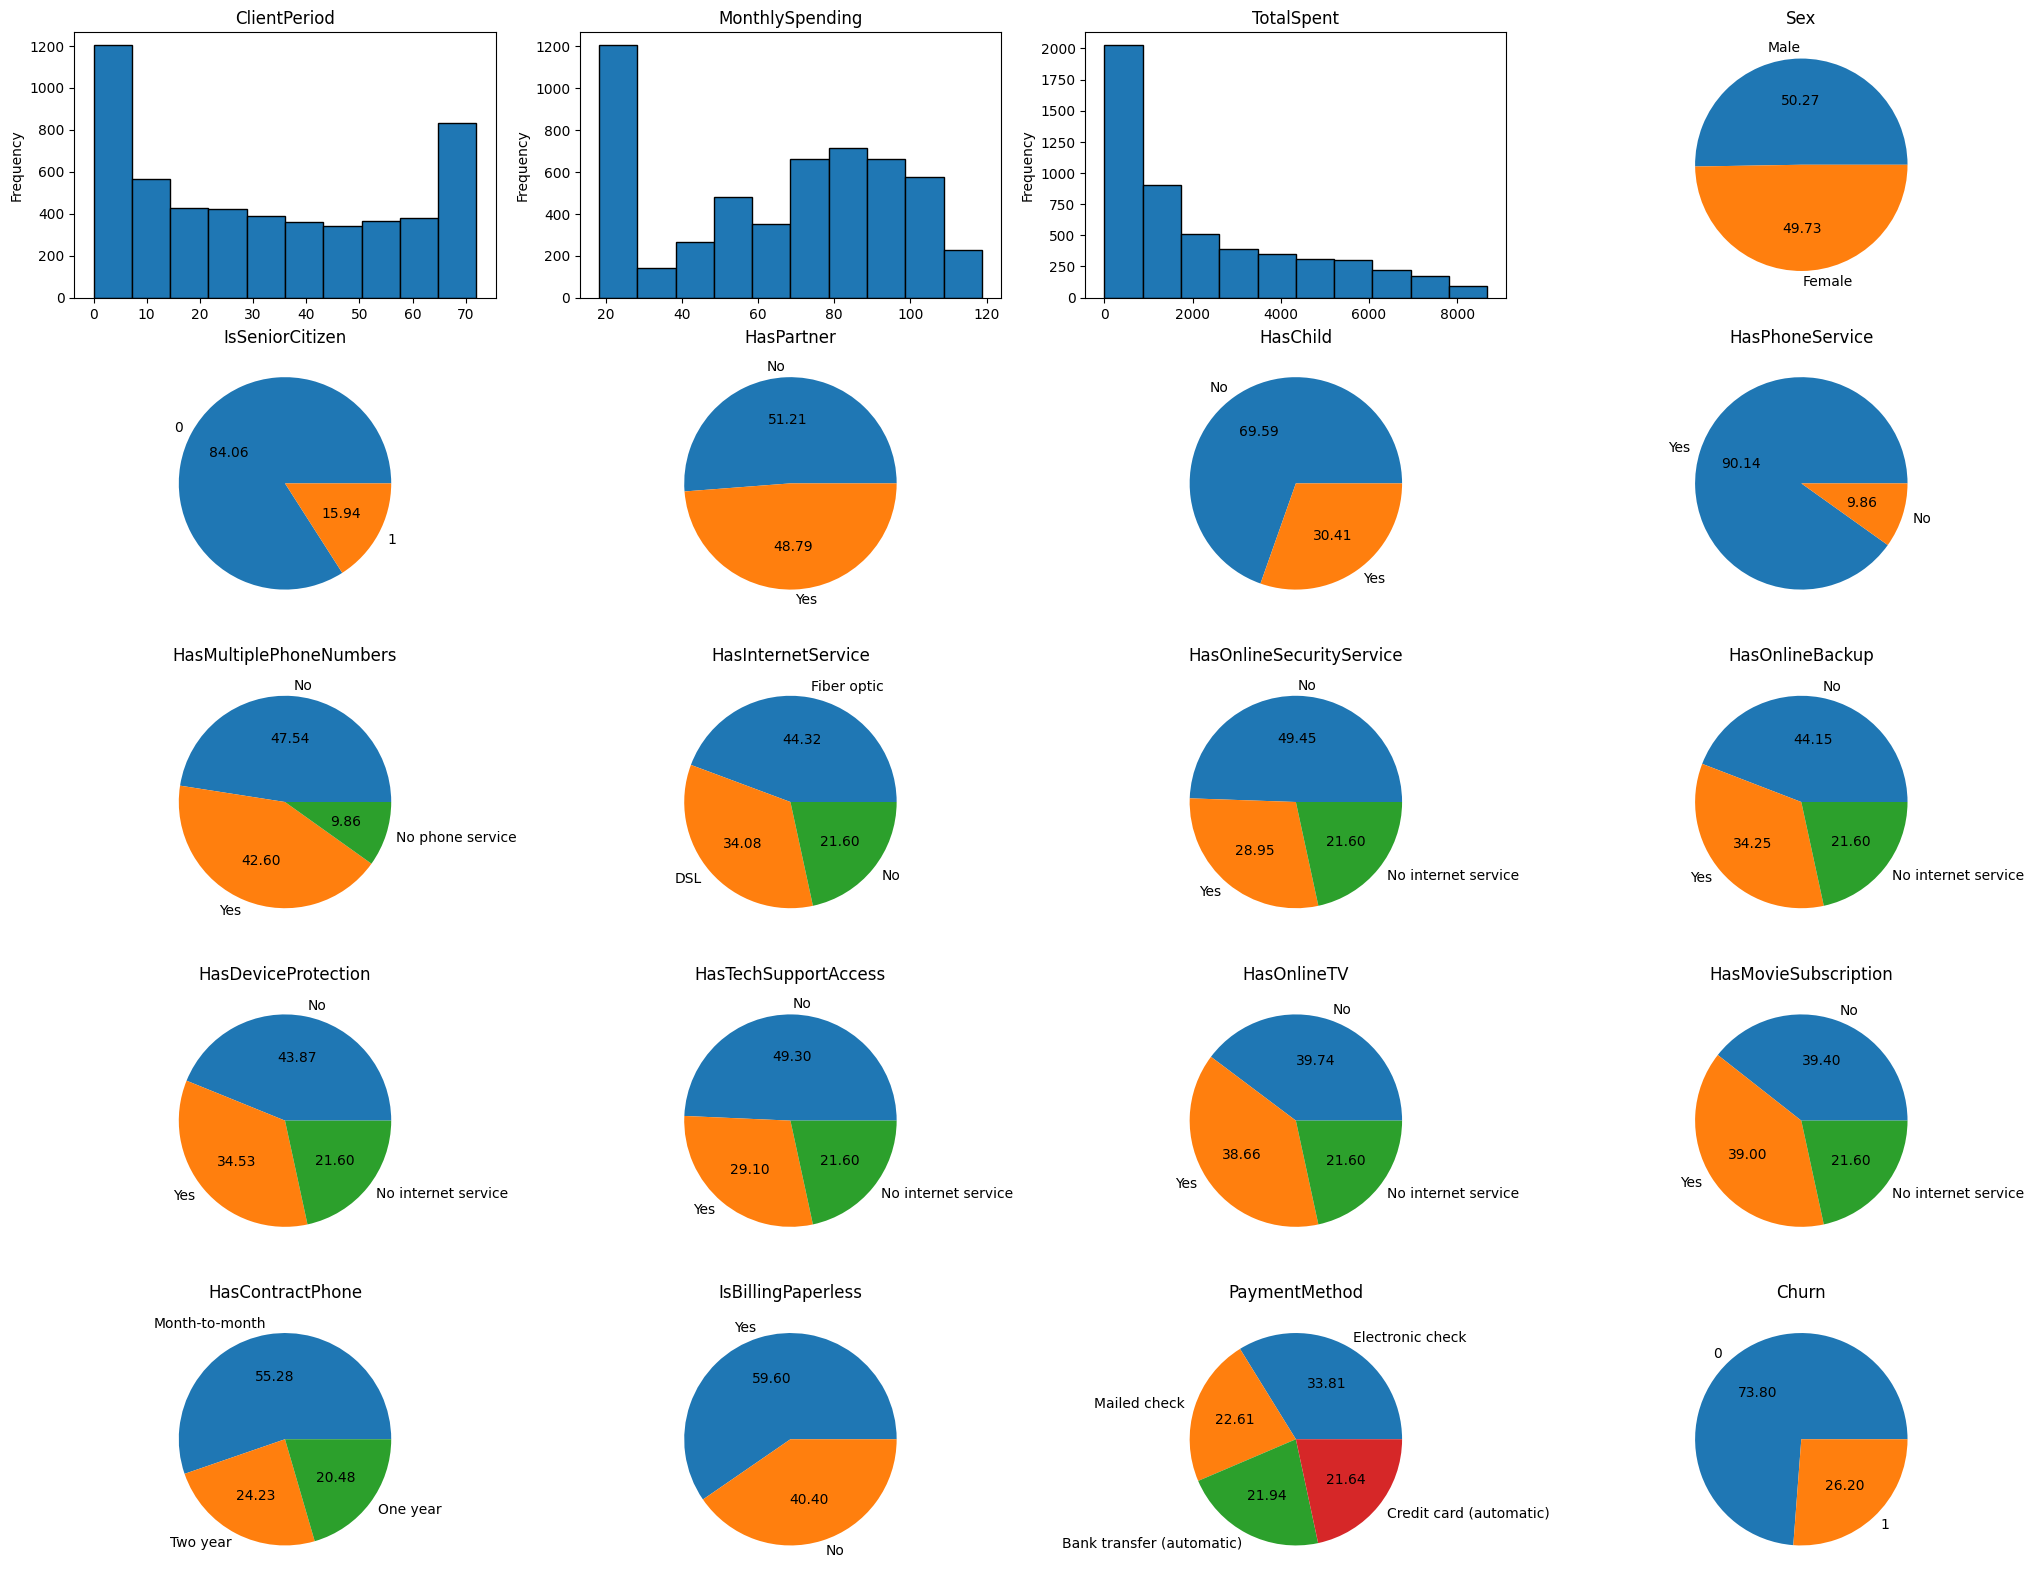

In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        
        ax.pie(data[col].value_counts(), autopct="%.2f", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

Самое интересное тут скорее метод оплаты чем все остальное, некоторые features обьеденим по "важности"

In [ ]:
tmp = data.groupby("PaymentMethod", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["churn frac"] = tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("churn frac").reset_index(drop=True)

PaymentMethod Churn       churn frac
                               sum count           
0    Credit card (automatic)   165  1143   0.144357
1  Bank transfer (automatic)   195  1159   0.168248
2               Mailed check   230  1194   0.192630
3           Electronic check   794  1786   0.444569

Поняли как идет распределение, теперь давайте сделаем OHE для каждой фичи, некоторые обьеденим (одинаковые по смыслу и распреденлению по графикам), в прочем думаю понятно, ведь так OHE и работает.

In [ ]:
OHE = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}
X_train = data.replace(OHE).drop(target_col, axis=1)
y_train = data[target_col]
X_test = X_test.replace(OHE)

чтобы работа зря не пропадала давайте матрицу коррелиций сделаем

In [ ]:
corrdf = pd.concat([X_train, y_train], axis=1)
corr=corrdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
ClientPeriod,1.000000,0.249414,0.826658,-0.006370,0.011561,0.370314,0.146120,0.013291,0.334744,0.031637,0.334992,0.362714,0.364792,0.322927,0.275781,0.293869,0.672612,0.008711,-0.332610,-0.350640
MonthlySpending,0.249414,1.000000,0.652014,0.011778,0.215456,0.087652,-0.125682,0.251283,0.485280,0.904812,0.295535,0.443517,0.484717,0.333374,0.634926,0.632375,-0.070987,0.344868,0.064446,0.184769
TotalSpent,0.826658,0.652014,1.000000,-0.006341,0.094640,0.308733,0.047241,0.116437,0.467258,0.427863,0.418245,0.511000,0.526292,0.429359,0.513861,0.527562,0.449672,0.157007,-0.223276,-0.200033
Sex,-0.006370,0.011778,-0.006341,1.000000,-0.013207,-0.002780,-0.014605,0.007771,0.003035,0.004945,0.012985,0.007417,0.002257,0.016317,0.015094,0.008897,0.006185,0.015698,-0.009837,0.008325
IsSeniorCitizen,0.011561,0.215456,0.094640,-0.013207,1.000000,0.016764,-0.217007,0.008763,0.135267,0.253264,-0.035052,0.068258,0.048119,-0.054669,0.104599,0.123656,-0.145131,0.151964,0.093681,0.156872
HasPartner,0.370314,0.087652,0.308733,-0.002780,0.016764,1.000000,0.442530,0.001508,0.134243,-0.006054,0.143668,0.134424,0.153821,0.121847,0.117244,0.118002,0.292764,-0.005293,-0.131511,-0.148347
HasChild,0.146120,-0.125682,0.047241,-0.014605,-0.217007,0.442530,1.000000,-0.010475,-0.030892,-0.191589,0.080863,0.016453,0.003817,0.057694,-0.023557,-0.034888,0.238125,-0.100777,-0.118935,-0.163609
HasPhoneService,0.013291,0.251283,0.116437,0.007771,0.008763,0.001508,-0.010475,1.000000,0.284968,0.096414,-0.098260,-0.044911,-0.066884,-0.103995,-0.024230,-0.025785,0.004736,0.021362,0.000751,0.010849
HasMultiplePhoneNumbers,0.334744,0.485280,0.467258,0.003035,0.135267,0.134243,-0.030892,0.284968,1.000000,0.336860,0.106104,0.203648,0.202934,0.091267,0.253287,0.255497,0.112489,0.159193,-0.040689,0.039572
HasInternetService,0.031637,0.904812,0.427863,0.004945,0.253264,-0.006054,-0.191589,0.096414,0.336860,1.000000,0.156182,0.306590,0.313442,0.160316,0.437452,0.429237,-0.289223,0.370638,0.167968,0.311280


Подозрительно выглядят отрицательные корреляции в контрактных и интернет сервисах, но дело это уже не наше

В надежде на хорошую скорость ставлю катбуст и смотрим на важность каждой корреляции

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


You should provide test set for use best model. use_best_model parameter has been switched to false value.


Text(0.5, 1.0, 'Feature Importance')

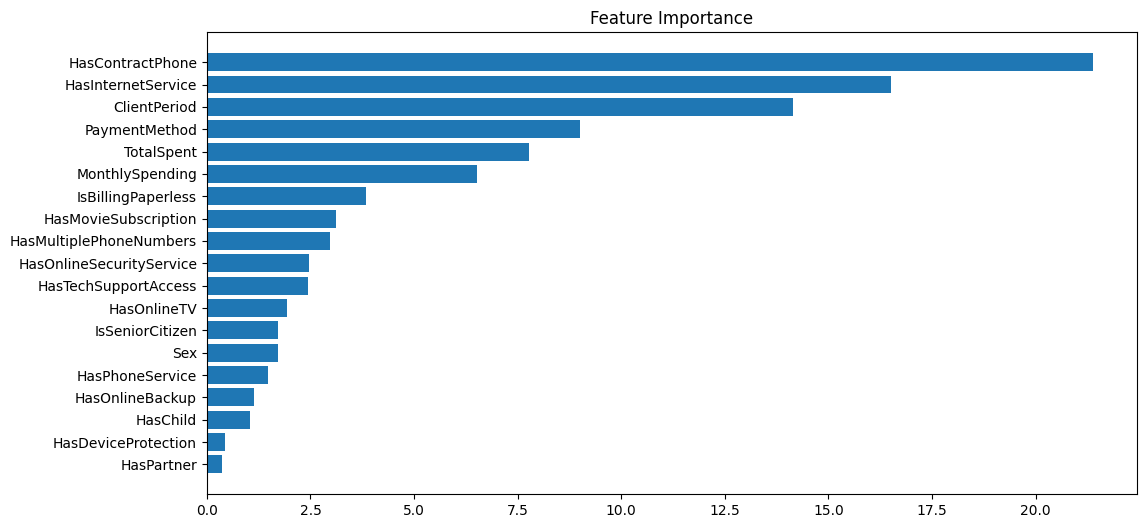

In [ ]:
from catboost import *
from catboost import CatBoostClassifier
train_pool = Pool(X_train, y_train, cat_cols)
#test_pool = Pool(X_test, y_test, cat_cols)

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, logging_level='Silent')
model.fit(X_train, y_train,cat_features=cat_cols, use_best_model=True, early_stopping_rounds=10)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')



Все получилось как мы и ожидали и обсуждали, теперь дело за деревом решений

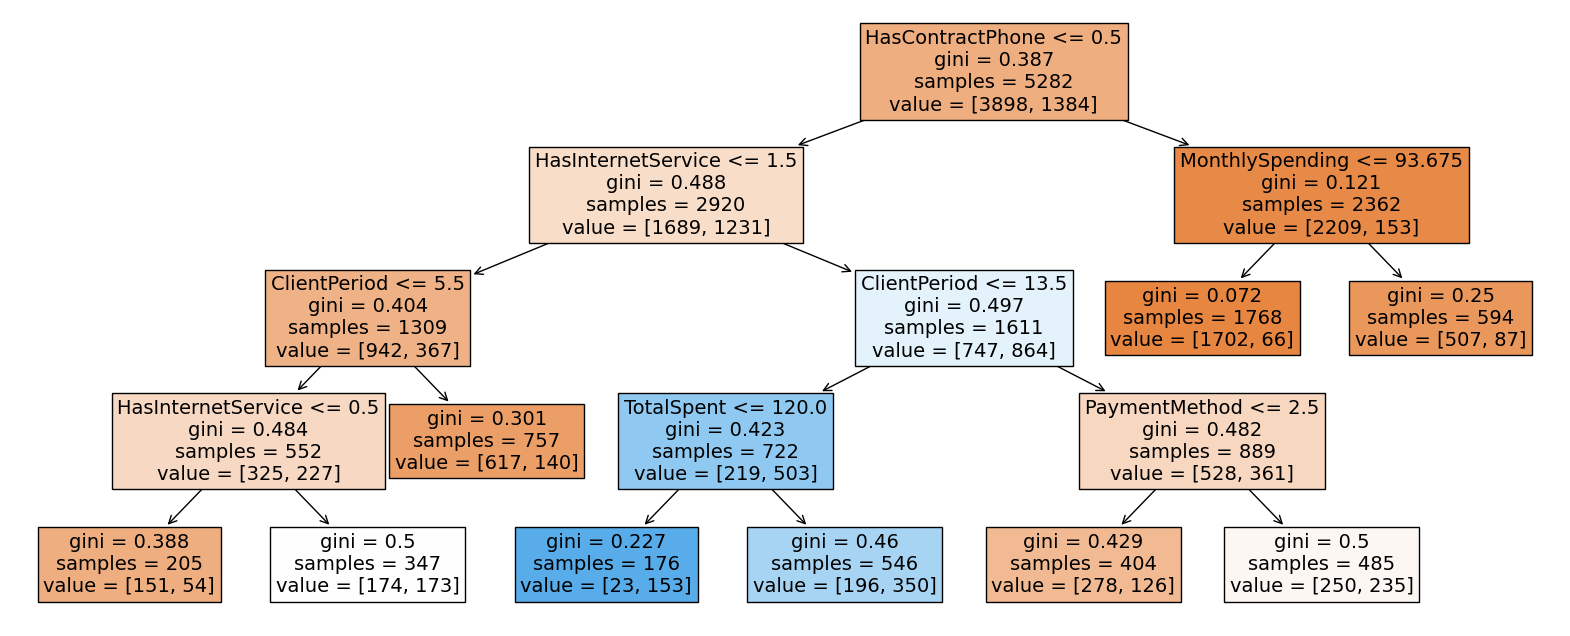

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.002)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 8))
tree.plot_tree(clf, fontsize=14, feature_names=X_train.columns, filled=True)
plt.show()

Проверим, подойдут ли нам простенькие регрессии с помощью PCA

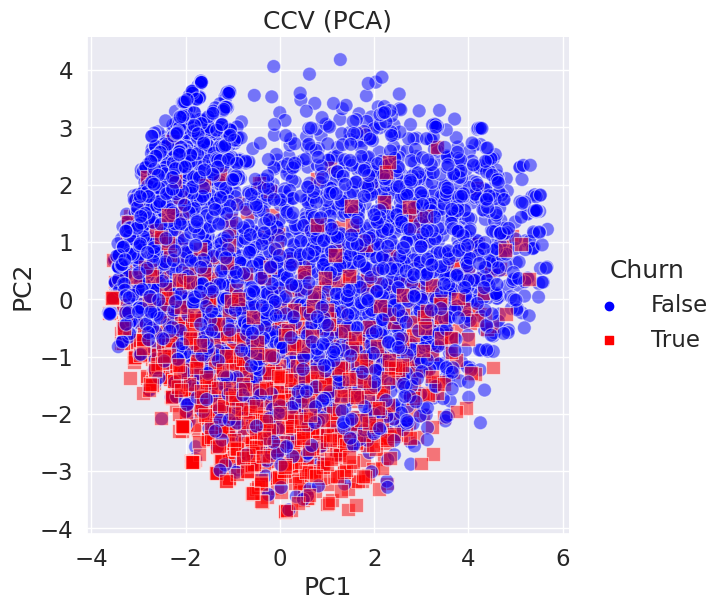

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
X_train_std = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=2)
pca.fit(X_train_std)
x0, x1 = pca.components_
sns.set(font_scale=1.5)
y = data["Churn"].map({0: False, 1: True})
fig = sns.pairplot(data=pd.concat([pd.DataFrame(data=X_train_std @ np.stack([x0, x1]).T, columns=["PC1", "PC2"]), y], axis=1),
                   x_vars="PC1",
                   y_vars="PC2",
                   hue="Churn",
                   markers=('o', 's'),
                   palette=["blue", "red"],
                   plot_kws={'s': 100, 'alpha': 0.5},
                   height=6)
fig.set(title="CCV (PCA)")

# Кусок кода был взят на каггле, так как он оказался самый быстрый и простой

***Большинство точек можно разделить прямой, то есть будем использовать логрегрессию***

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
%%time
PARAMS = {
    "model__C": [10]
}
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=1000)),
])
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=PARAMS,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)
logreg = grid_search.fit(X_train, y_train)

CPU times: user 604 ms, sys: 14.4 ms, total: 618 ms
Wall time: 4.95 s


In [ ]:
print(f"best score: {logreg.best_score_}")

best score: 0.8453459904051035


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

так как у меня нет достаточно мощного устройства, чтобы в разумное время перебрать гиперпараметр, вручную ставил его от 0.1 до 10 - лучший результат около 1.8, скор выведен

      ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0               42            56.10    2386.85    Male                0   
1               29            98.50    3004.15    Male                1   
2                9            76.25     684.85    Male                0   
3               67            74.00     4868.4  Female                0   
4               71            20.10     1389.6  Female                0   
...            ...              ...        ...     ...              ...   
1756            71           105.15       7555  Female                0   
1757            13            20.85     272.35  Female                0   
1758             2            91.45     171.45    Male                0   
1759            19            89.10     1620.8  Female                0   
1760            72            65.60     4566.5    Male                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0           Yes       No       

In [ ]:
submission = pd.read_csv("submission.csv")
submission["Churn"] = logreg.predict_proba(X_test)[:, 1]
submission.to_csv("logreg.csv", index=False)

ValueError: ignored

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=42,
)

PARAMS = {
    "n_estimators": [250],  
    "learning_rate": [0.05],  
    "max_depth": [3], 
    "l2_leaf_reg": [10],  
    "subsample": [0.6],  
    "random_strength": [5], 
    "min_data_in_leaf": [100],  
}
catboost.grid_search(PARAMS, X_train, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8647445	best: 0.8647445 (0)	total: 3.8s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 3,
  'l2_leaf_reg': 10,
  'iterations': 700,
  'subsample': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 699],
              'test-AUC-mean': [0.7623768899895721, 0.8421298371922852],
              'test-AUC-std': [0.025533137152638986, 0.014866708489427735],
              'train-AUC-mean': [0.7611482616841629, 0.886218661560229],
              'train-AUC-std': [0.010166050015942668, 0.001795307825431851],
              'test-Logloss-mean': [0.6678857616769287, 0.4163242342973206],
              'test-Logloss-std': [0.0024770689927254156, 0.01835612452796899],
              'train-Logloss-mean': [0.6679440554058471, 0.3642632686550017],
              'train-Logloss-std': [0.0022187214643370253,
               0.002645291053520694]})}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить



```
0:	loss: 0.8683700	best: 0.8683700 (0)	total: 2.08s	remaining: 0us
Estimating final quality...
{'params': {'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 3,
  'l2_leaf_reg': 7,
  'iterations': 400,
  'subsample': 0.5,
  'learning_rate': 0.04},
 'cv_results': defaultdict(list,
             {'iterations': [0, 399],
              'test-AUC-mean': [0.6554071377790244, 0.8483436761334886],
              'test-AUC-std': [0.02632269724314587, 0.014880145583188223],
              'train-AUC-mean': [0.6557696995981999, 0.8658771816478703],
              'train-AUC-std': [0.0363539074638696, 0.003442351069021306],
              'test-Logloss-mean': [0.6792450894042681, 0.4099114185642735],
              'test-Logloss-std': [0.0004889947433968953, 0.01761753476053234],
              'train-Logloss-mean': [0.6791910850741524, 0.3897200135190093],
              'train-Logloss-std': [0.0006440620422130038,
               0.004560618520949408]})}
```



In [ ]:
print("Best score:", end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'Logloss': 0.37434049460530416, 'AUC': 0.8778245550556533}}
Best params: {'random_seed': 42, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 100, 'random_strength': 5, 'depth': 3, 'l2_leaf_reg': 10, 'iterations': 700, 'subsample': 0.6, 'learning_rate': 0.05}


```Best score: {'learn': {'Logloss': 0.3832784378931056, 'AUC': 0.8709051551558973}}
Best params: {'metric_period': 1000, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 80, 'random_strength': 4, 'depth': 4, 'l2_leaf_reg': 9, 'iterations': 400, 'subsample': 0.4, 'learning_rate': 0.04}```

Долго сидел перебирал параметры, можно конечно еще что то интресное сделать, но думаю это качество почти максимум на данном датасете

# Предсказания

In [ ]:
best_model = catboost

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)
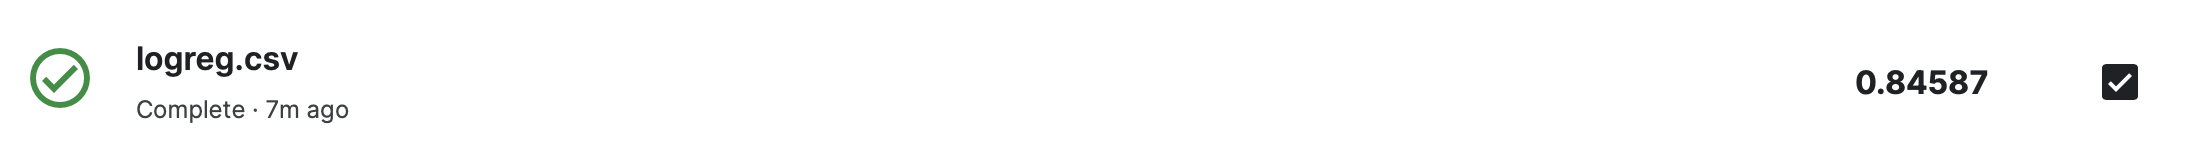
Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.